In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


'pip' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Sets plot style to ggplot
plt.style.use('ggplot')


In [18]:
# STEP 1: Retrieve and Inspect Data
df = pd.read_csv('inclusive_features_usage.csv')
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN


In [21]:
# describe the data to get familiar with it
df.describe

<bound method NDFrame.describe of         user_id        feature_used  session_duration  engagement_score  \
0     user_4737        Multilingual             60.77                 4   
1     user_1492      Text-to-Speech             20.20                 5   
2     user_5936     Colorblind Mode             93.78                 2   
3     user_5519     Colorblind Mode             26.36                 3   
4     user_1853  High Contrast Mode             91.67                 5   
...         ...                 ...               ...               ...   
9995   user_667          Visual Aid            110.11                 1   
9996  user_3554          Visual Aid             22.44                 3   
9997  user_8892        Multilingual             12.91                 4   
9998  user_8014        Multilingual             19.23                 3   
9999  user_7722      Text-to-Speech             92.66                 2   

      accessibility_settings     age_group      gender additional

In [22]:
# check data types for columns
df.dtypes

user_id                    object
feature_used               object
session_duration          float64
engagement_score            int64
accessibility_settings      int64
age_group                  object
gender                     object
additional_attributes      object
dtype: object

In [ ]:
# STEP 2: Data Cleaning and Preparation
# Missing Values

missing_values = df.isnull()

missing_count = df.isnull().sum()

# print(missing_values)
print(missing_count)

# I can see that only the 'gender' and 'additional_attributes' columns have missing values

user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                    3997
additional_attributes     6003
dtype: int64


In [34]:
# Use fillna() to replace missing values iwth 'Unknown' or 'None'A

# Replace missing values in 'gender' with 'Unknown'
df['gender'].fillna('Unknown', inplace=True)

# Replace missing values in 'additional_attributes' to 'None'
df['additional_attributes'].fillna('None', inplace=True)

# Check to make sure missing values are handled

print(df.isnull().sum())

user_id                   0
feature_used              0
session_duration          0
engagement_score          0
accessibility_settings    0
age_group                 0
gender                    0
additional_attributes     0
dtype: int64


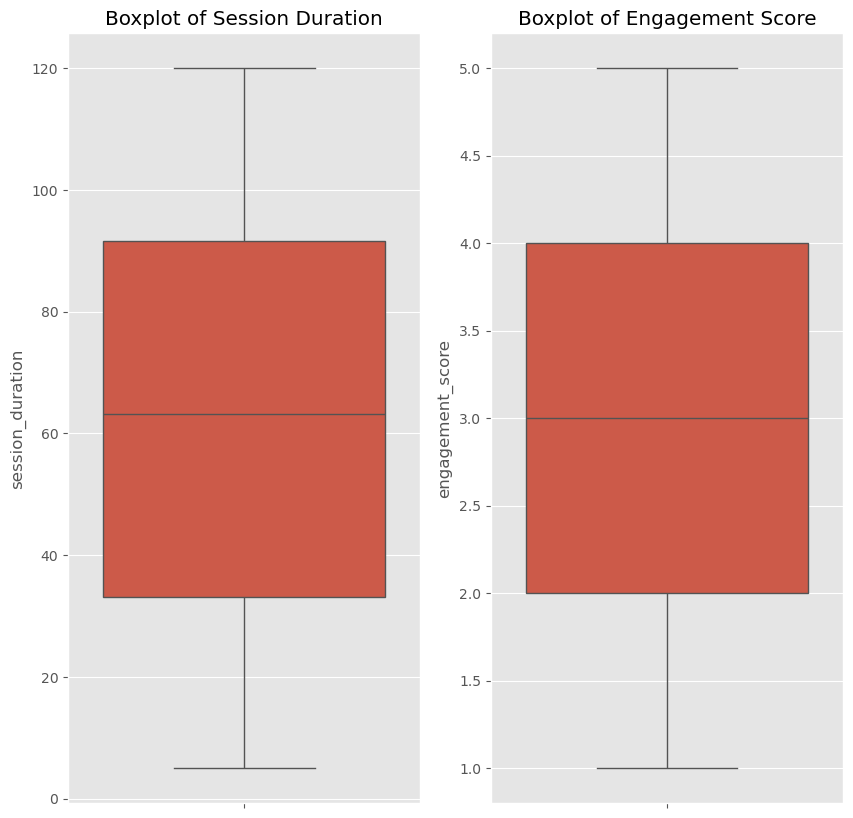

In [65]:
# Detect and Handle Outliers using boxplots and IQR

# set plot measures
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# boxplot for session_duration
sns.boxplot(df['session_duration'], ax=axes[0])
axes[0].set_title('Boxplot of Session Duration')

# boxplot for engagement_score
sns.boxplot(df['engagement_score'], ax=axes[1])
axes[1].set_title('Boxplot of Engagement Score')

plt.show()

# Detect Outliers
for col in ['session_duration', 'engagement_score']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # Replace outliers with upper or lower bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


In [ ]:
# High Accessibility User Classification
# create a binary column called 'high_accessibility_user' for users with 3 or more accesibility settings
df['high_accessibility_users'] = df['accessibility_settings'] >= 3

"""
Why I chose True/False instead of 1/0?

I chose True/False because it provides a straightforward interpretation 
of the model's predicition which makes it easier to understand what the model
classifies as positive or negative. Makes it easier for the performance of a
machine learning model
"""

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,high_accessibility_users
0,user_4737,Multilingual,60.77,4.0,4,Teenager,Unknown,LGBTQ+,True
1,user_1492,Text-to-Speech,20.20,5.0,4,Professional,Non-Binary,None,True
2,user_5936,Colorblind Mode,93.78,2.0,2,Adult,Female,None,False
3,user_5519,Colorblind Mode,26.36,3.0,1,Adult,Unknown,LGBTQ+,False
4,user_1853,High Contrast Mode,91.67,5.0,1,Young Adult,Male,None,False
...,...,...,...,...,...,...,...,...,...
9995,user_667,Visual Aid,110.11,1.0,5,Adult,Non-Binary,None,True
9996,user_3554,Visual Aid,22.44,3.0,2,Professional,Male,None,False
9997,user_8892,Multilingual,12.91,4.0,2,Senior,Non-Binary,None,False
9998,user_8014,Multilingual,19.23,3.0,1,Professional,Unknown,LGBTQ+,False


In [70]:
# Intersectionality Analysis
# combine 'age_group', 'gender', and 'additiotional_attributes' into one new column
df['intersectional_label'] = (df['age_group'] + " - " +df['gender'] + " - " + 
                              df['additional_attributes'])

In [71]:
# Verify changes from STEP 1
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,high_accessibility_users,intersectional_label
0,user_4737,Multilingual,60.77,4.0,4,Teenager,Unknown,LGBTQ+,True,Teenager - Unknown - LGBTQ+
1,user_1492,Text-to-Speech,20.20,5.0,4,Professional,Non-Binary,None,True,Professional - Non-Binary - None
2,user_5936,Colorblind Mode,93.78,2.0,2,Adult,Female,None,False,Adult - Female - None
3,user_5519,Colorblind Mode,26.36,3.0,1,Adult,Unknown,LGBTQ+,False,Adult - Unknown - LGBTQ+
4,user_1853,High Contrast Mode,91.67,5.0,1,Young Adult,Male,None,False,Young Adult - Male - None


In [ ]:
##########################################################################
##########################################################################

C:\Users\19787\AppData\Local\Temp\ipykernel_2112\1568883257.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_avg_engagement, x='feature_used', y='engagement_score', palette=color)


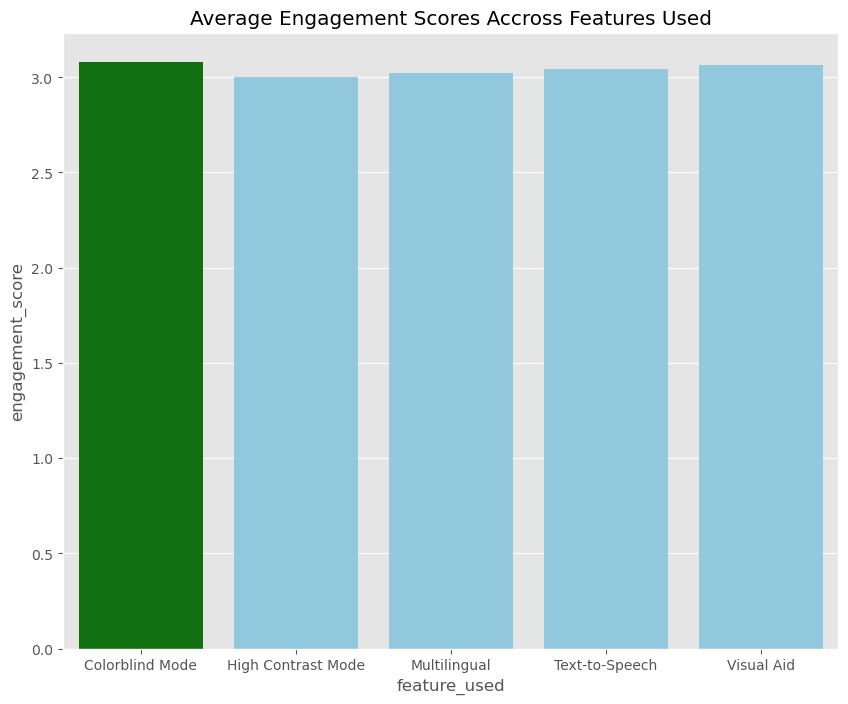

         feature_used  engagement_score  highlight
0     Colorblind Mode          3.081068       True
1  High Contrast Mode          3.003488      False
2        Multilingual          3.021234      False
3      Text-to-Speech          3.045546      False
4          Visual Aid          3.065917      False


In [ ]:
# STEP 3: Exploratory Data Analysis (EDA)

# Average enagagement score for each feature used
feature_avg_engagement = df.groupby('feature_used')['engagement_score'].mean().reset_index()

# Find feature used with highest avg engagement score
max_feature_engagement = feature_avg_engagement['engagement_score'].max()
feature_avg_engagement['highlight'] = feature_avg_engagement['engagement_score'] == max_feature_engagement

# Define color palette for highlightig purposes
color = ['green' if highlight else 'skyblue' for highlight in feature_avg_engagement['highlight']]

# Engagement score by 'feature_used'
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_avg_engagement, x='feature_used', y='engagement_score', palette=color)
plt.title('Average Engagement Scores Accross Features Used')
plt.show()

# Colorblind Mode had the highest engagement score with green highlight

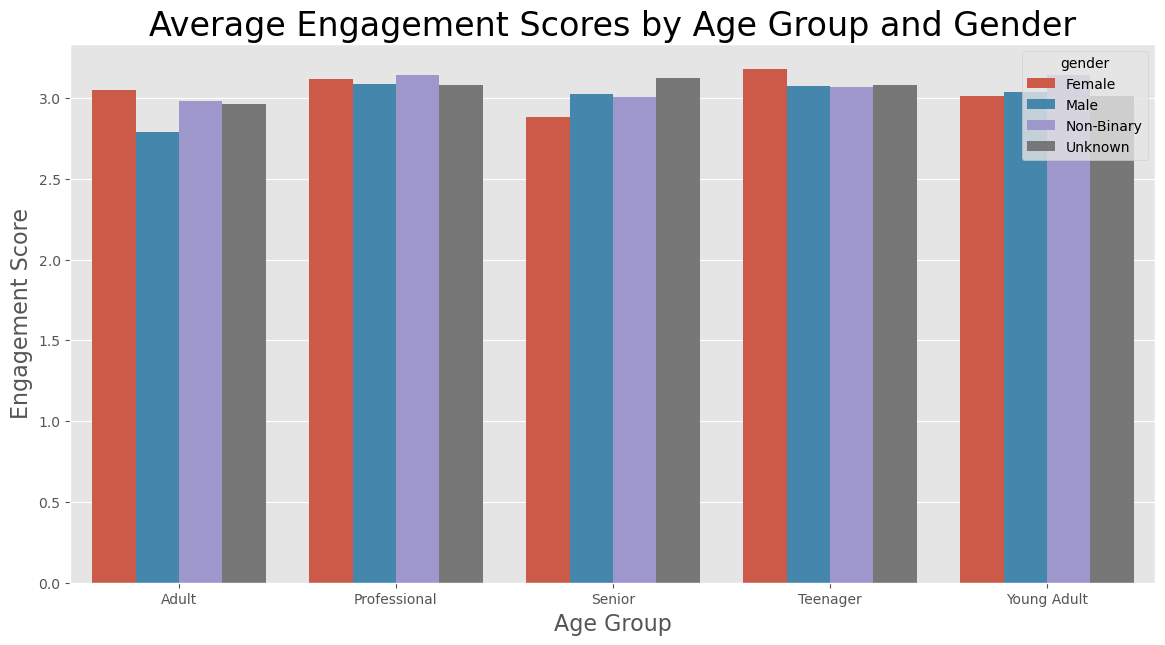

In [112]:
# Average engagement score for age_group and gender
age_gender_avg_engagement = df.groupby(['age_group', 'gender'])['engagement_score'].mean().reset_index()

# Plot of engagement score by age group and gender
plt.figure(figsize=(14, 7))
sns.barplot(data=age_gender_avg_engagement, x='age_group', y='engagement_score', hue='gender')
plt.title('Average Engagement Scores by Age Group and Gender', fontsize=24)
plt.ylabel('Engagement Score', fontsize=16)
plt.xlabel('Age Group', fontsize=16)
plt.legend(title='gender')
plt.show()


C:\Users\19787\AppData\Local\Temp\ipykernel_2112\1568466063.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_gender_engagement, x='gender', y='engagement_score', palette=colors)


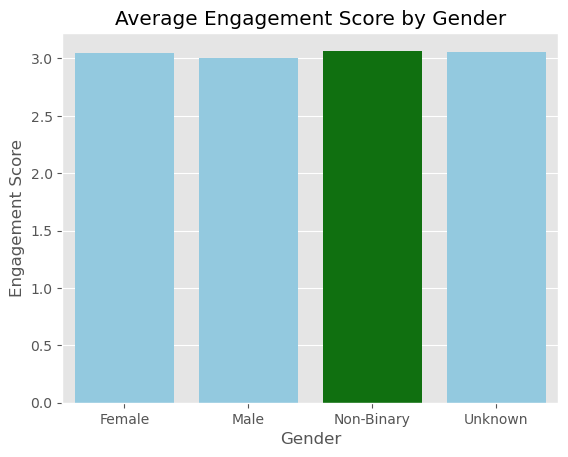

In [152]:
# Average engagement score by gender
avg_gender_engagement = df.groupby(['gender'])['engagement_score'].mean().reset_index()

# Find gender with highest engagment for highlight purposes
max_engagement = avg_gender_engagement['engagement_score'].max()
avg_gender_engagement['highlight'] = avg_gender_engagement['engagement_score'] == max_engagement

# Define colors for highlighted column/gender
colors = ['green' if highlight else 'skyblue' for highlight in avg_gender_engagement['highlight']]

sns.barplot(data=avg_gender_engagement, x='gender', y='engagement_score', palette=colors)
plt.title('Average Engagement Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Engagement Score')
plt.show()

#print(avg_gender_engagement)

# Non-Binary has the highest engagement score as highlighted with orange

C:\Users\19787\AppData\Local\Temp\ipykernel_2112\3320833210.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=add_attr_avg_engagement, x='additional_attributes', y='engagement_score', palette=colors)


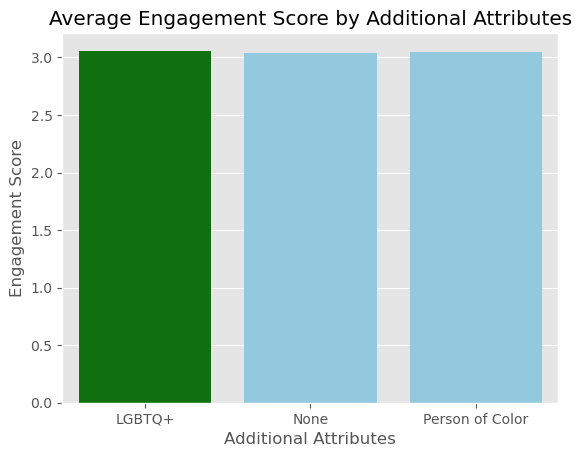

In [ ]:
# Average engagement score by additional features
add_attr_avg_engagement = df.groupby(['additional_attributes'])['engagement_score'].mean().reset_index()

# Find additional attribute with highest avg engagement score
max_addattr_engagement = add_attr_avg_engagement['engagement_score'].max()
add_attr_avg_engagement['highlight'] = add_attr_avg_engagement['engagement_score'] == max_addattr_engagement

colors = ['green' if highlight else 'skyblue' for highlight in add_attr_avg_engagement['highlight']]

sns.barplot(data=add_attr_avg_engagement, x='additional_attributes', y='engagement_score', palette=colors)
plt.title('Average Engagement Score by Additional Attributes')
plt.xlabel('Additional Attributes')
plt.ylabel('Engagement Score')
plt.show()

# LGBTQ+ has highest avg engagement score as shown in green highlight

C:\Users\19787\AppData\Local\Temp\ipykernel_2112\2105555410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=intersectional_engagement, y='intersectional_label', x='engagement_score', palette=colors)


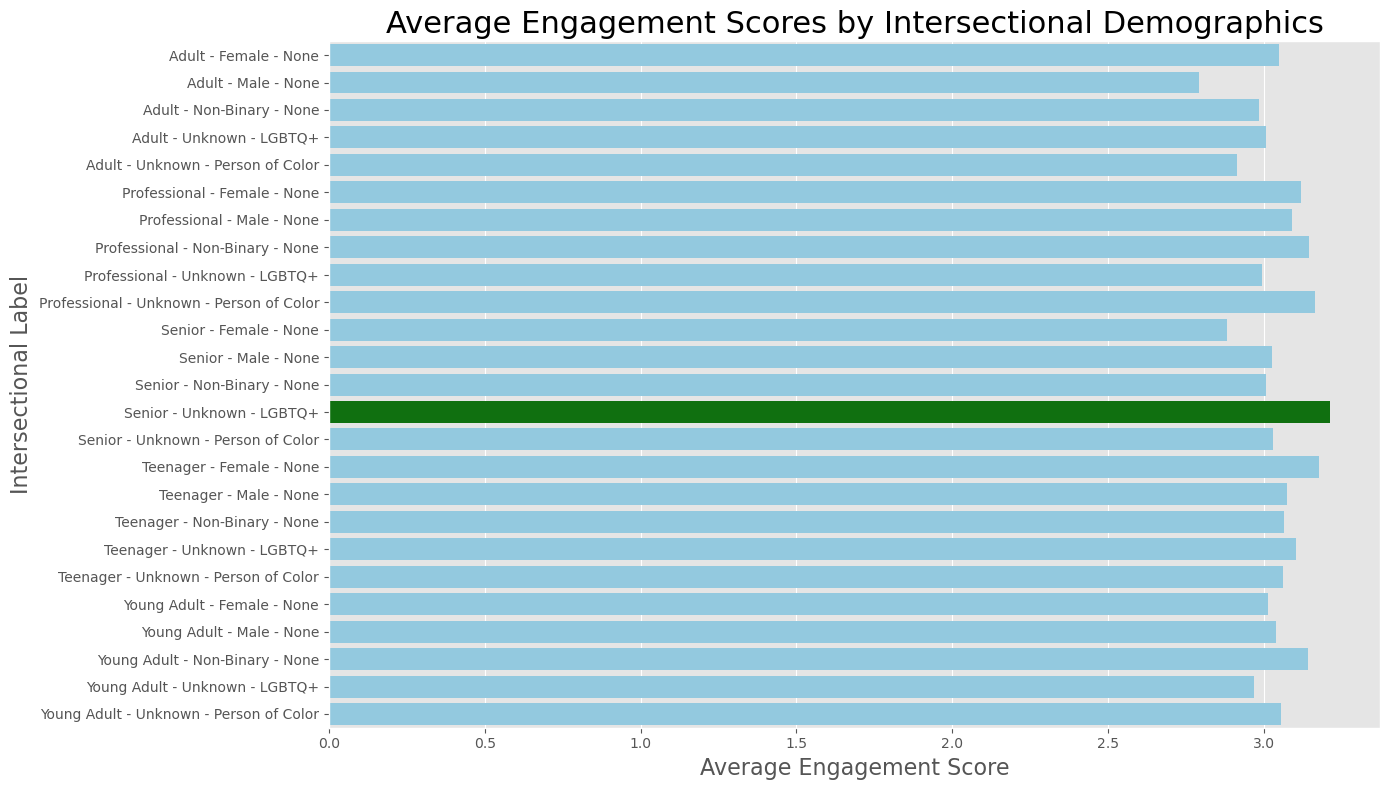

In [166]:
# Calculate mean engagement scores grouped by intersectional_label
intersectional_engagement = df.groupby('intersectional_label')['engagement_score'].mean().reset_index()

max_intersectional_engagement = intersectional_engagement['engagement_score'].max()
intersectional_engagement['highlight'] = intersectional_engagement['engagement_score'] == max_intersectional_engagement

colors = ['green' if highlight else 'skyblue' for highlight in intersectional_engagement['highlight']]

# Plot using a horizontal bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=intersectional_engagement, y='intersectional_label', x='engagement_score', palette=colors)
plt.title('Average Engagement Scores by Intersectional Demographics', fontsize=22)
plt.xlabel('Average Engagement Score', fontsize=16)
plt.ylabel('Intersectional Label', fontsize=16)
plt.tight_layout()
plt.show()

# Intersection label with highest avg engagement score is 'Senior-Unknown-LGBTQ+'


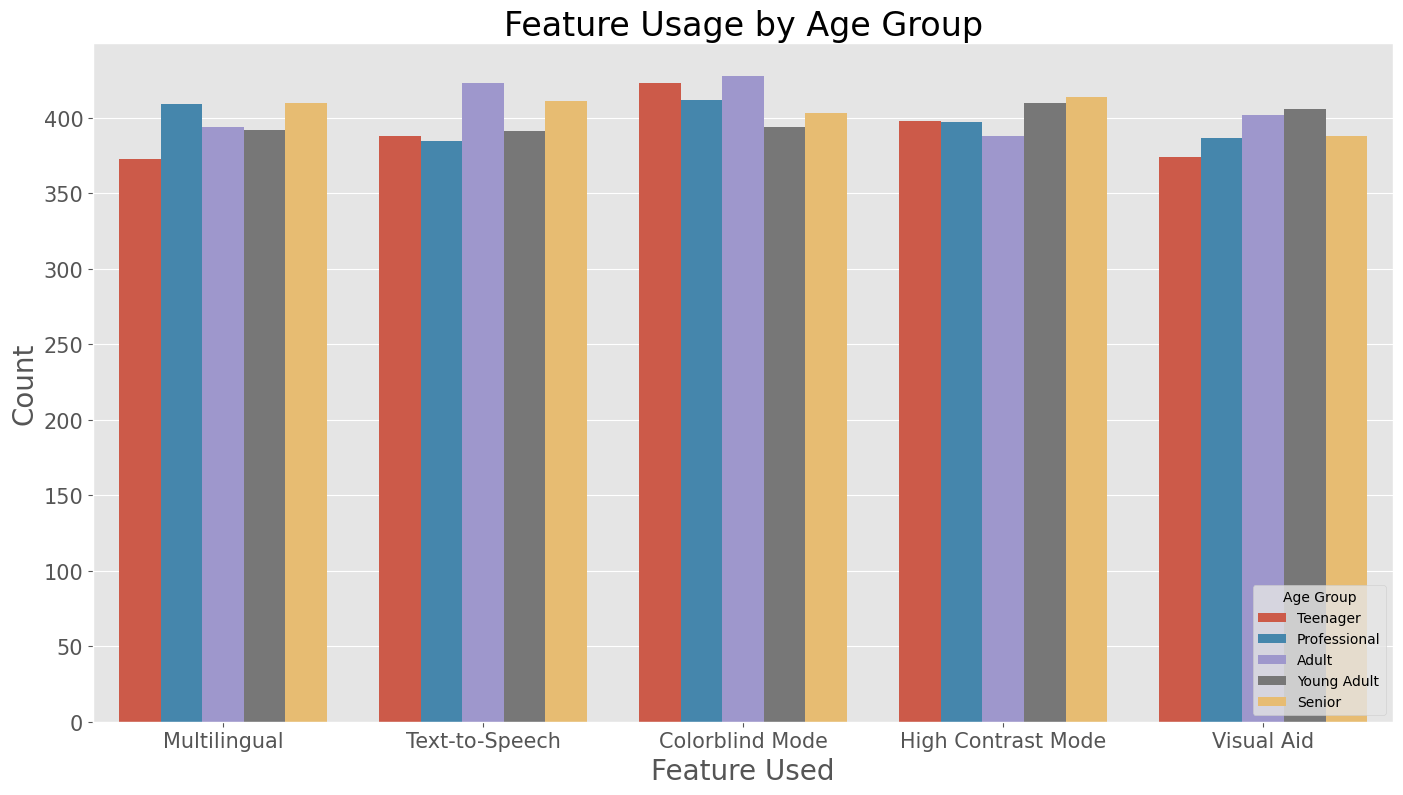

'\nMultilingual feature is mostly used by seniors and professionals\nText-to-Speech feature is mostly used by adults\nColorblind Mode feature is mostly used by adults and teenagers\nHigh Contrast Mode is mostly used by seniors\nVisual\n'

In [ ]:
# Feature Usage by Demographics
# Examining patterns in feature_used across demographic attributes
# Count of features used across age group
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='feature_used', hue='age_group')
plt.title('Feature Usage by Age Group', fontsize=24)
plt.xlabel('Feature Used', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(title='Age Group', loc='lower right', fontsize=10)
plt.tight_layout()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

"""
Multilingual feature is mostly used by seniors and professionals
Text-to-Speech feature is mostly used by adults
Colorblind Mode feature is mostly used by adults and teenagers
High Contrast Mode is mostly used by seniors
Visual Aid feature is mostly used by Young Adults
"""

In [ ]:
# Save updated data to a folder for Tableau purposes

df.to_csv(r'C:\Users\19787\Downloads\MSIS_415\inclusive_features_cleaned.csv', index=False)



In [ ]:
# STEP 4: Feature Engineering $ Predictive Modeling

# Average session duration per feature used
avg_session_duration_per_feature = df.groupby('feature_used')['session_duration'].mean().reset_index() 
avg_session_duration_per_feature.columns = ['feature_used', 'avg_session_duration_per_feature'] 

# Merge the new DataFrame with the original one 
df = df.merge(avg_session_duration_per_feature, on='feature_used', how='left') 

#df.head(20)

In [ ]:
# Average engagement score by accessibility settings
avg_engagement_by_accessibility = df.groupby(['accessibility_settings'])['engagement_score'].mean().reset_index() 
avg_engagement_by_accessibility.columns = ['accessibility_settings', 'avg_engagement_by_accessibility'] 

# Merge to original DataFrame
df = df.merge(avg_engagement_by_accessibility, on='accessibility_settings', how='left')

In [241]:
# Average engagement score by age group
avg_engagement_by_age_group = df.groupby(['age_group'])['engagement_score'].mean().reset_index()
avg_engagement_by_age_group.columns = ['age_group', 'avg_engagement_by_age_group']

# Merge new feature to original DataFrame
df = df.merge(avg_engagement_by_age_group, on='age_group', how='left')

In [244]:
# Average engagement score by gender
avg_engagement_by_gender = df.groupby(['gender'])['engagement_score'].mean().reset_index()
avg_engagement_by_gender.columns = ['gender', 'avg_engagement_by_gender']

# Merge new feature to original DataFrame
df = df.merge(avg_engagement_by_gender, on='gender', how='left')

In [246]:
# Predictive Model using Decision Tree
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score



In [253]:
# Split data into training and testing data

# Features
features = ['age_group', 'gender', 'additional_attributes', 'engagement_score', 'feature_used']
target = 'high_accessibility_users'

# Split into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Separate features into categorical and numerical
categorical_features = ['age_group', 'gender', 'additional_attributes', 'feature_used']
numerical_features = ['engagement_score']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

In [ ]:
# pipeline for decision tree
# mex depth of 5
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Train the model
tree_pipeline.fit(X_train, y_train)

# predict
y_pred_tree = tree_pipeline.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# The model has an accuracy score of 50.3%

Accuracy:  0.5026666666666667
              precision    recall  f1-score   support

       False       0.52      0.46      0.49      1542
        True       0.49      0.54      0.51      1458

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



In [ ]:
# Example to determine if a single user is a high accessibility user
# Use Adult - Female - None - 2.0 engagement score - Colorblind Mode
user_data = pd.DataFrame({
    'age_group': ['Adult'],
    'gender': ['Female'],
    'additional_attributes': ['None'],
    'engagement_score': [2.0],
    'feature_used': ['Colorblind Mode']
})

# prediction for this user
prediction = tree_pipeline.predict(user_data)

# print result
print("User Prediction: ", prediction[0])

"""
The prediction came out as True meaning a user with all those features
is predicted to be a high-accessibility user, or has 3+ accessibility 
settings.

False would mean the user is not predicted to be a high accessibility user.

"""

User Prediction:  True
